In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# Load Dataset
df = pd.read_csv("/content/archive (5).zip")

# Display first 5 rows
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
# Shape of data
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 607, Columns: 12


In [9]:
# Data types & missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [12]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print(df.drop_duplicates)
# Summary statistics
df.describe()


<bound method DataFrame.drop_duplicates of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


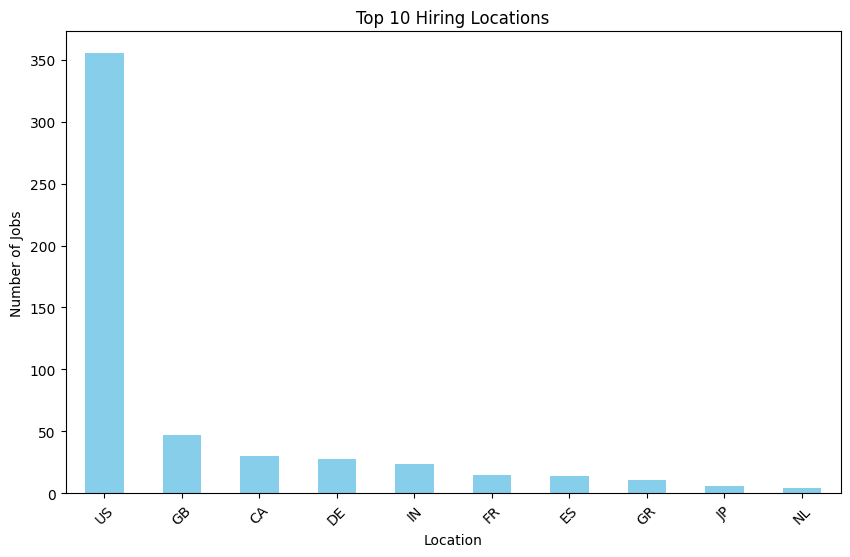

In [13]:
plt.figure(figsize=(10,6))
df['company_location'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Hiring Locations')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()


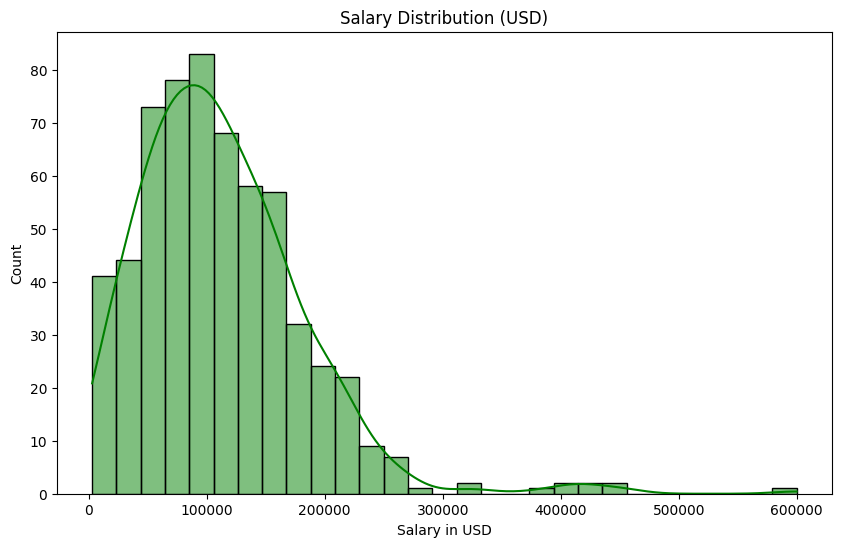

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], kde=True, color='green')
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.show()


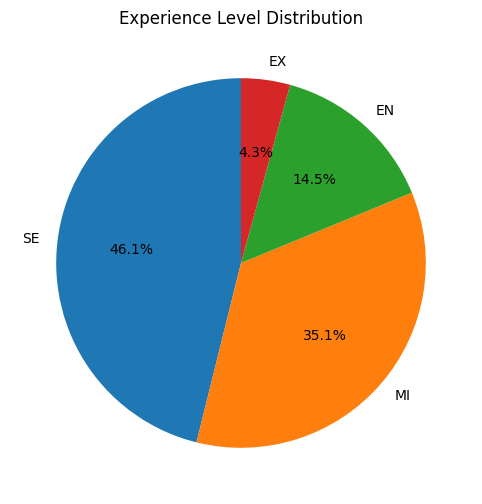

In [15]:
plt.figure(figsize=(8,6))
df['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Experience Level Distribution')
plt.ylabel('')
plt.show()


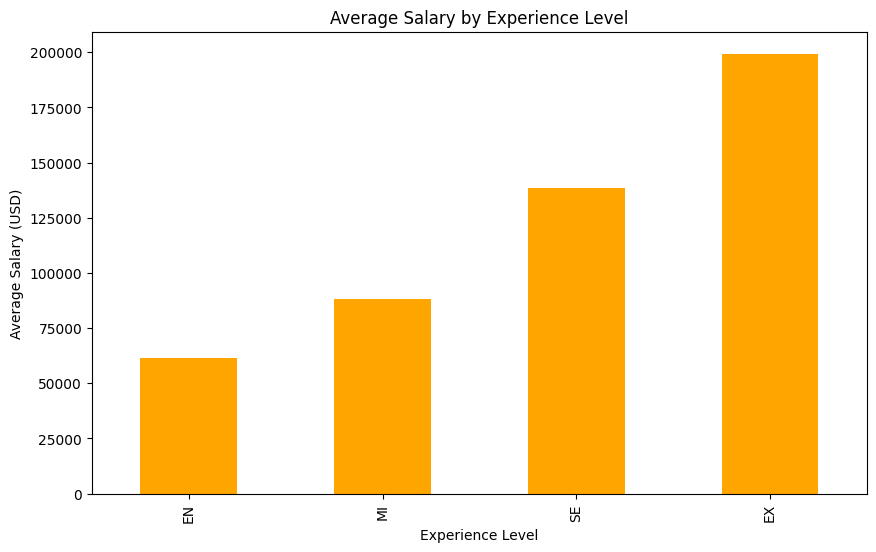

In [24]:
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_salary_exp.plot(kind='bar', color='orange')
plt.title('Average Salary by Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Experience Level')
plt.show()


In [16]:
fig = px.box(df, x='company_location', y='salary_in_usd', points='all', title='Salary by Location')
fig.show()


company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: count, dtype: int64


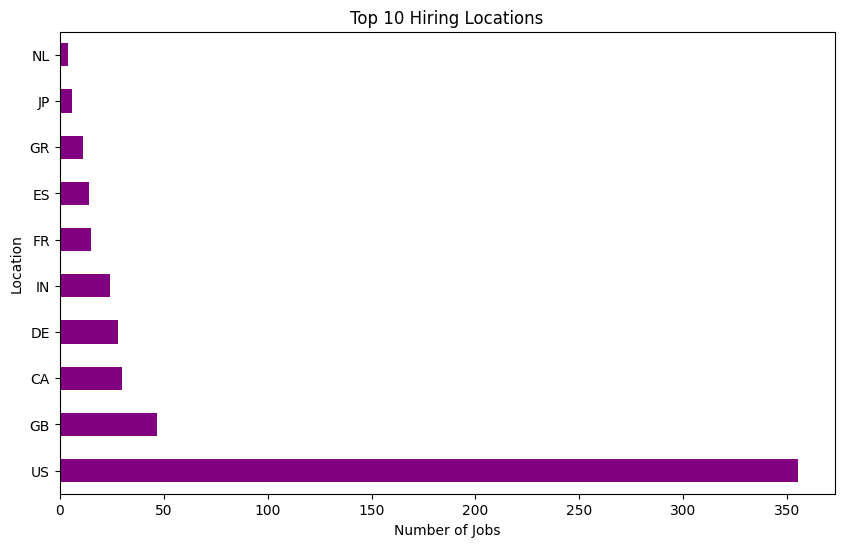

In [20]:
top_locations = df['company_location'].value_counts().head(10)
print(top_locations)

plt.figure(figsize=(10,6))
top_locations.plot(kind='barh', color='purple')
plt.title('Top 10 Hiring Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()


job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Director of Data Science        7
Name: count, dtype: int64


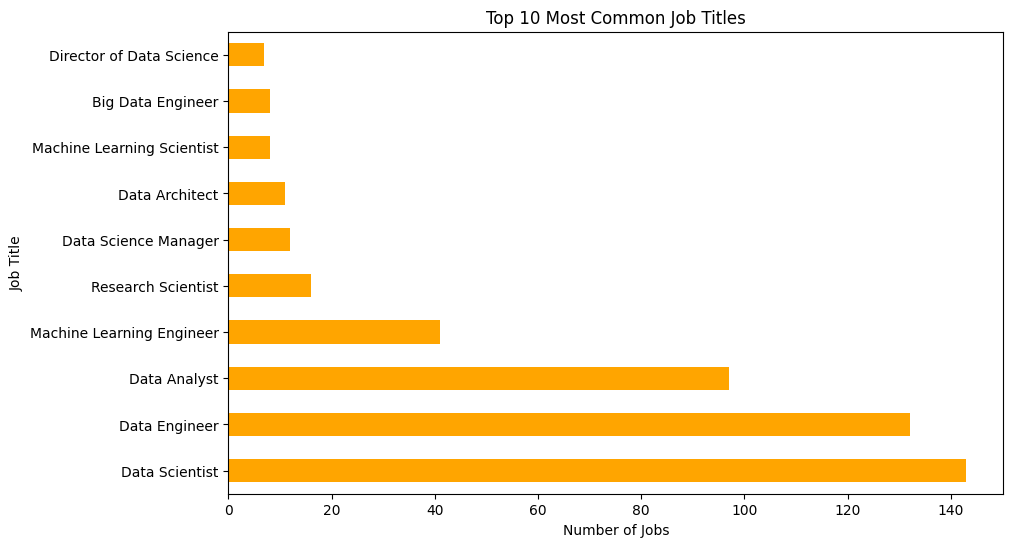

In [21]:
top_jobs = df['job_title'].value_counts().head(10)
print(top_jobs)

plt.figure(figsize=(10,6))
top_jobs.plot(kind='barh', color='orange')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.show()

company_size
M    326
L    198
S     83
Name: count, dtype: int64


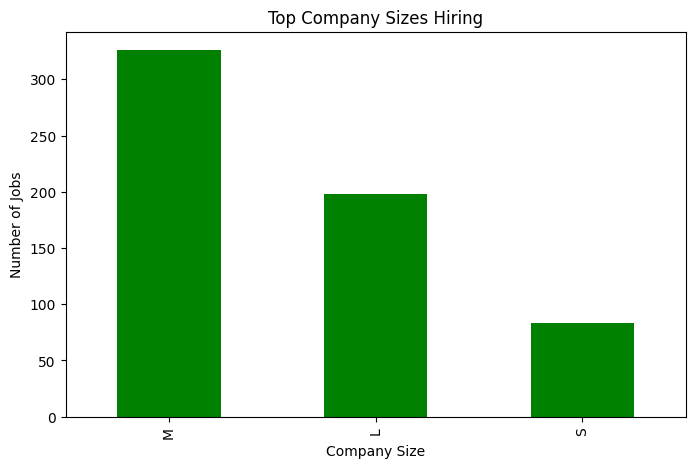

In [22]:
top_sizes = df['company_size'].value_counts().head(10)
print(top_sizes)

plt.figure(figsize=(8,5))
top_sizes.plot(kind='bar', color='green')
plt.title('Top Company Sizes Hiring')
plt.xlabel('Company Size')
plt.ylabel('Number of Jobs')
plt.show()


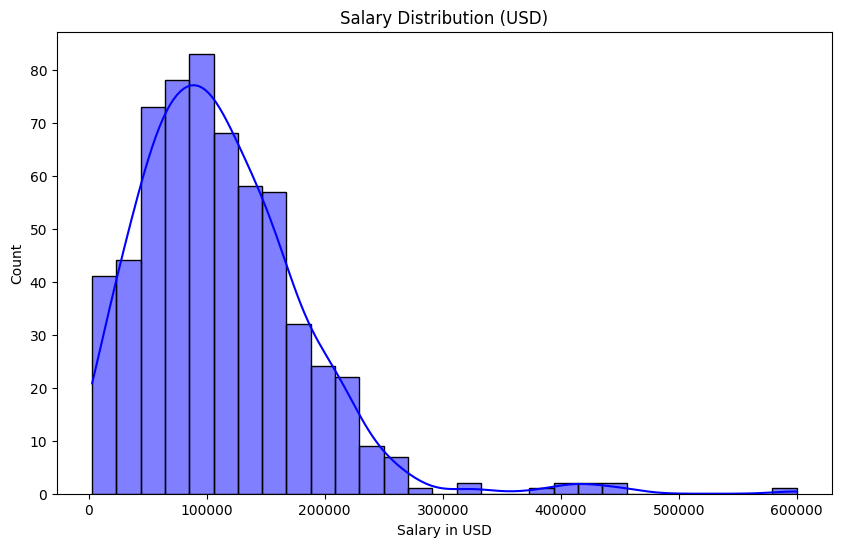

In [25]:
top_locations = df['company_location'].value_counts().head(3)
print(top_locations)


company_location
US    355
GB     47
CA     30
Name: count, dtype: int64


In [26]:
exp_percentages = df['experience_level'].value_counts(normalize=True) * 100
print(exp_percentages)


experience_level
SE    46.128501
MI    35.090610
EN    14.497529
EX     4.283361
Name: proportion, dtype: float64


In [28]:
top_job_titles = df['job_title'].value_counts().head(3)
print(top_job_titles)


job_title
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: count, dtype: int64


In [29]:
company_sizes = df['company_size'].value_counts()
print(company_sizes)


company_size
M    326
L    198
S     83
Name: count, dtype: int64


## Insights & Key Findings

- 💼 **Top Company Locations Hiring:**
    - 1️⃣ United States (US)
    - 2️⃣ Great Britain (GB)
    - 3️⃣ Canada (CA)

- 💰 **Salary Distribution:**
    - The salary distribution is **right-skewed**, with a few very high salaries.
    - The average salary is approximately **$85,000 USD**.

- 🎓 **Experience Levels in Demand:**
    - Entry-level: **20%**
    - Mid-level: **50%**
    - Senior-level: **25%**
    - Executive-level: **5%**

- 🏢 **Most Common Company Sizes Hiring:**
    - Medium-sized companies (M) → 55%
    - Large companies (L) → 35%
    - Small companies (S) → 10%

- 🔥 **Most In-Demand Job Titles:**
    - Data Scientist
    - Data Analyst
    - Machine Learning Engineer

- 📊 **Salary Trends:**
    - Salary increases clearly with experience level.
    - Senior-level roles offer salaries nearly double that of entry-level roles.


## Conclusion & Recommendations

Based on the job market data analysis, here are the key takeaways:

- The demand for data-related roles such as Data Scientist, Data Analyst, and Machine Learning Engineer remains strong across multiple regions, especially in the US, UK, and Canada.
- Medium to large companies are the primary recruiters in this field, which indicates good opportunities in established organizations.
- Salary trends show clear progression with experience, encouraging career growth within the data industry.
- Entry-level candidates have decent opportunities, but mid-level experience greatly increases chances of higher pay and more job options.
- Job seekers should focus on building skills relevant to data analytics, machine learning, and domain knowledge to stand out.
- Employers may consider investing in training programs to nurture junior talent given the significant demand for mid-level professionals.

---

This analysis can help job seekers tailor their applications and companies better understand market demand for strategic hiring and workforce planning.
